# Fallstudie: Vorhersage von Immobilienpreisen

## Ziel dieser Fallstudie

* Anwendung der erlernten Methoden zur Vorhersage von Immobilienpreisen.
* Verwendung eines realen Datensatzes zur Modellierung.
* Umsetzung in Python mit `scikit-learn`.

## Schritte zur Umsetzung

1. Daten laden und verstehen

   * Nutzung eines offenen Datensatzes (z.B. California Housing Dataset oder Kaggle Immobilienpreise).
   * Untersuchung der Datenverteilung, Korrelationen und möglicher Ausreißer.

2. Datenvorbereitung

   * Umwandlung kategorischer Merkmale (One-Hot-Encoding).
   * Normalisierung und Skalierung numerischer Merkmale.
   * Aufteilung in Trainings- und Testdaten.

3. Modelltraining mit Lineare Regression

   * Trainieren eines Linearen Regressionsmodells mit scikit-learn.
   * Verwendung von Metriken zur Bewertung der Modellgüte (z.B. MSE, R²).

4. Modellbewertung und Interpretation

   * Bewertung der Modellperformance auf dem Testdatensatz.
   * Interpretation der wichtigsten Einflussgrößen.

## Code-Beispiel

In [3]:
import sys
# !{sys.executable} -m pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 6.6 MB/s eta 0:00:0000:010:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip


### Importe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Beispieldatensatz laden (California Housing Dataset)

In [2]:
from sklearn.datasets import fetch_california_housing


housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df["PRICE"] = housing.target

df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


## Aufteilung in Merkmale (`x`) und Zielvariable (`y`)

In [3]:
x = df.drop("PRICE", axis=1)
y = df["PRICE"]

## Aufteilung in Trainings- und Testsets

In [4]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

## Feature Scaling

In [5]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Lineare Regression trainieren

In [6]:
model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

In [7]:
model.coef_

array([ 0.85438303,  0.12254624, -0.29441013,  0.33925949, -0.00230772,
       -0.0408291 , -0.89692888, -0.86984178])

In [8]:
model.intercept_

2.0719469373788777

## Vorhersagen treffen

In [9]:
y_pred = model.predict(x_test_scaled)

## Modellbewertung

In [10]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mittlerer quadratischer Fehler (MSE): {mse}")
print(f"Bestimmtheitsmaß (R²): {r2}")

Mittlerer quadratischer Fehler (MSE): 0.5558915986952442
Bestimmtheitsmaß (R²): 0.575787706032451


## Visualisierung der Vorhersagen

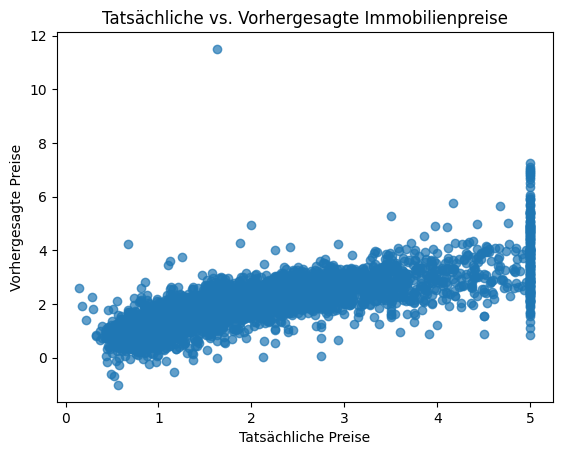

In [11]:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Tatsächliche Preise")
plt.ylabel("Vorhergesagte Preise")
plt.title("Tatsächliche vs. Vorhergesagte Immobilienpreise")
plt.show()